In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier  # Import XGBoost
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Load the dataset
file_path = "cleaned_weather_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Data preparation: Convert 'Cloud Coverage' into categorical labels
def categorize_cloud_coverage(value):
    if value <= 10:
        return 'Clear Sky'
    elif value <= 30:
        return 'Few Clouds'
    elif value <= 60:
        return 'Scattered Clouds'
    elif value <= 80:
        return 'Broken Clouds'
    else:
        return 'Overcast Clouds'

data['Cloud Coverage Category'] = data['Cloud Coverage'].apply(categorize_cloud_coverage)

# Select features and target variable
features = ['Temperature', 'Humidity', 'Pressure', 'Wind Speed']  
target = 'Cloud Coverage Category'

X = data[features]
y = data[target]

In [10]:
# Encode target variable into numerical labels for SVM and XGBoost
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features for SVM and XGBoost
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# XGBoost Implementation
# Use the entire dataset for XGBoost training and testing
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost classifier on the full dataset
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_full, y_train_full)

# Predict on test data using XGBoost
y_pred_xgb = xgb_model.predict(X_test_full)

In [12]:
# Evaluate XGBoost performance
xgb_acc = accuracy_score(y_test_full, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

xgb_cm = confusion_matrix(y_test_full, y_pred_xgb)
print("Confusion Matrix:\n", xgb_cm)
print("Classification Report:\n", classification_report(y_test_full, y_pred_xgb))

XGBoost Accuracy: 0.6583333333333333
Confusion Matrix:
 [[ 0  1  1  1  1]
 [ 3 57  3  5  4]
 [ 0  2  6  0  4]
 [ 1  1  3 14  3]
 [ 0  7  0  1  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.84      0.79      0.81        72
           2       0.46      0.50      0.48        12
           3       0.67      0.64      0.65        22
           4       0.14      0.20      0.17        10

    accuracy                           0.66       120
   macro avg       0.42      0.43      0.42       120
weighted avg       0.68      0.66      0.67       120



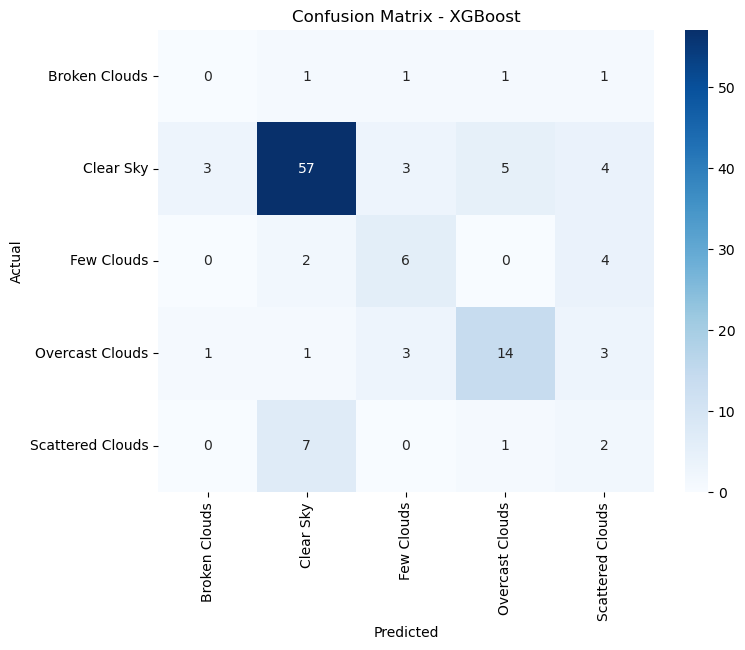

In [13]:
# Visualize confusion matrix for XGBoost using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

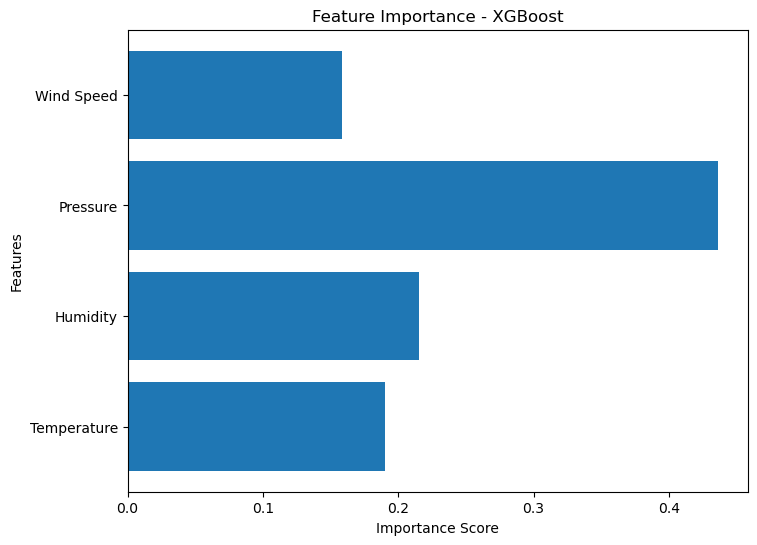

In [14]:
# Feature importance visualization for XGBoost
plt.figure(figsize=(8, 6))
plt.barh(features, xgb_model.feature_importances_)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
